In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [184]:
# Check Duplication

print(data.duplicated().value_counts()) # 240 duplicate rows
data.drop_duplicates(inplace=True, keep="first") # Drop duplications, keep the first duplictaed row
data.reset_index(inplace=True, drop=True) # Reset dataframe index to continuous integers
data.head()

False    1359
True      240
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [185]:
#Shape of Data
data.shape

(1359, 12)

In [186]:
# Check Missing Values and data types of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


All numerical values and no missing data (1359 non-null).

In [187]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2B5ACA100>,
      dtype=object)

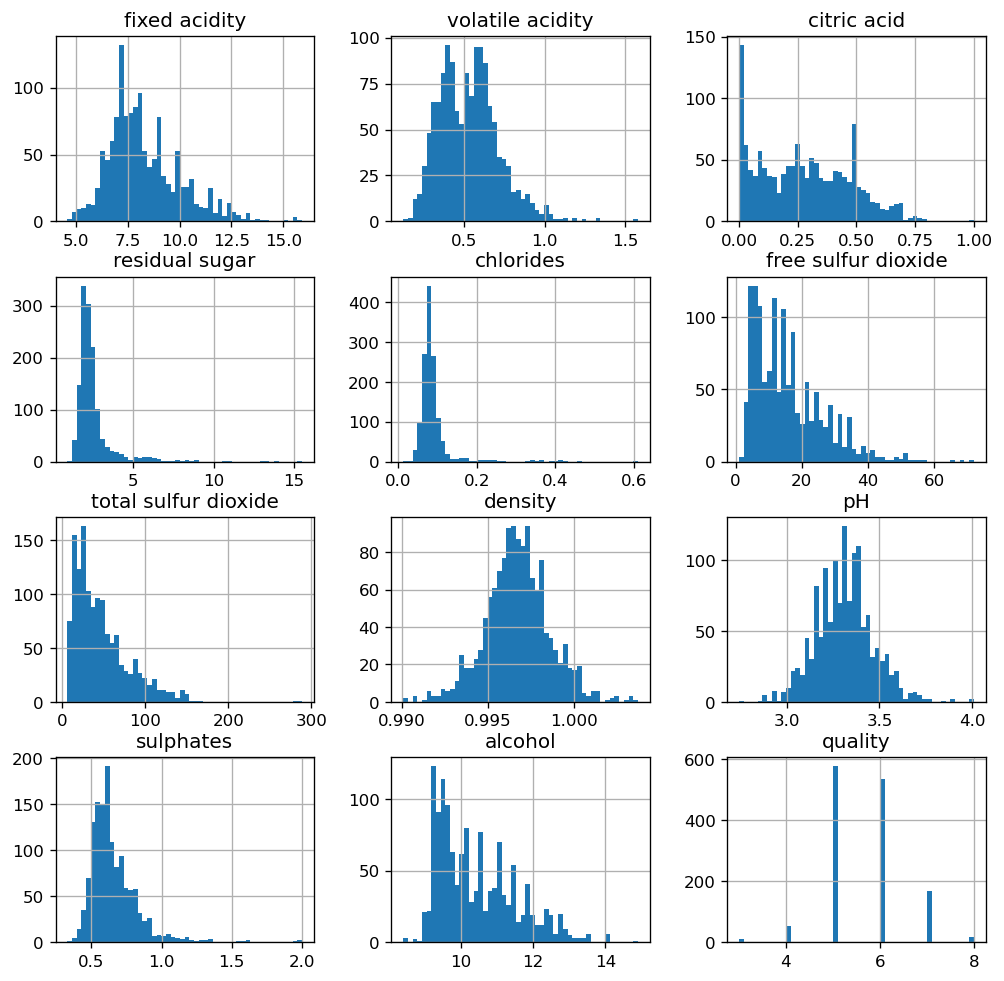

In [188]:
# Check Distribution of each variable

plt.rcParams["figure.dpi"] = 120
data.hist(bins=50, figsize=(10,10))

Distributions of ``free sulfur dioxide``, ``total sulfur dioxide``, ``residual sugar`` are a bit skewed. Z-Scoring could help normalize their distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2B7B1AFA0>,
      dtype=object)

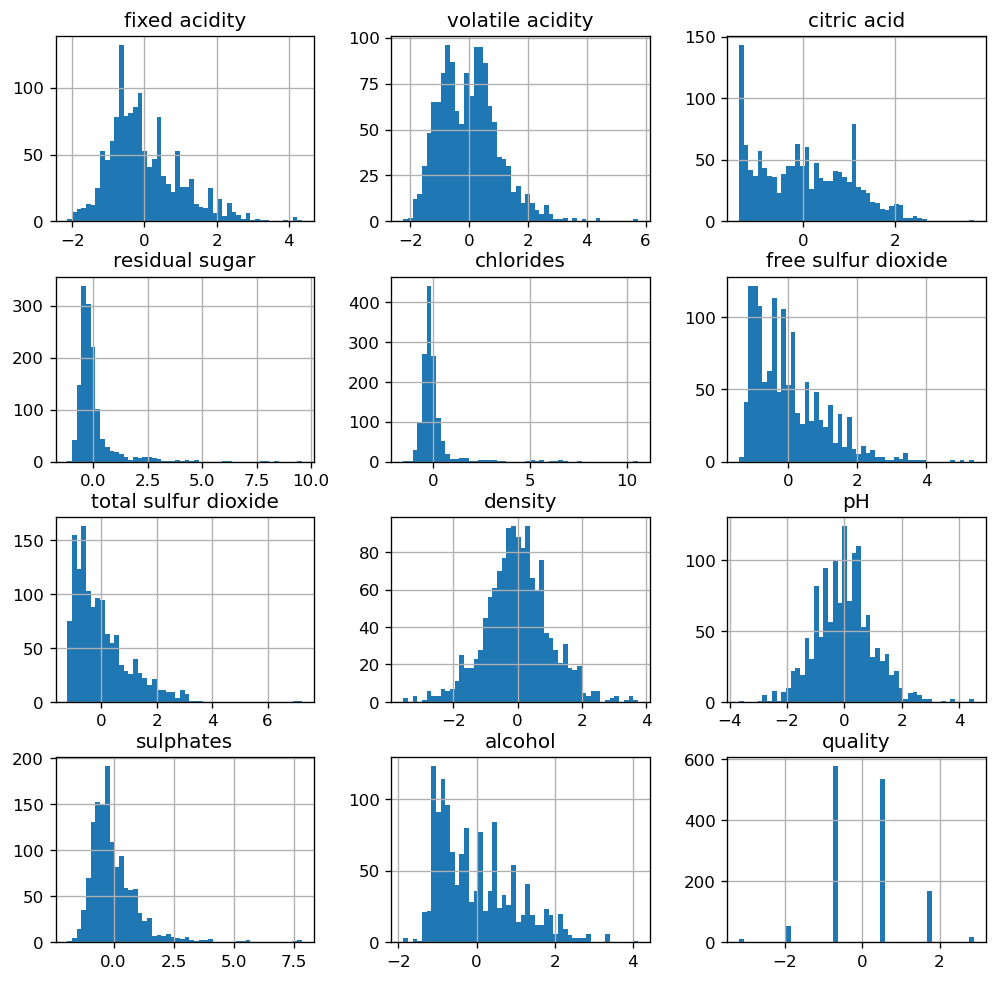

In [189]:
# Optional: Z-scoring the data

data_z_scored = (data - data.mean())/data.std()
data_z_scored.hist(bins=50, figsize=(10,10))

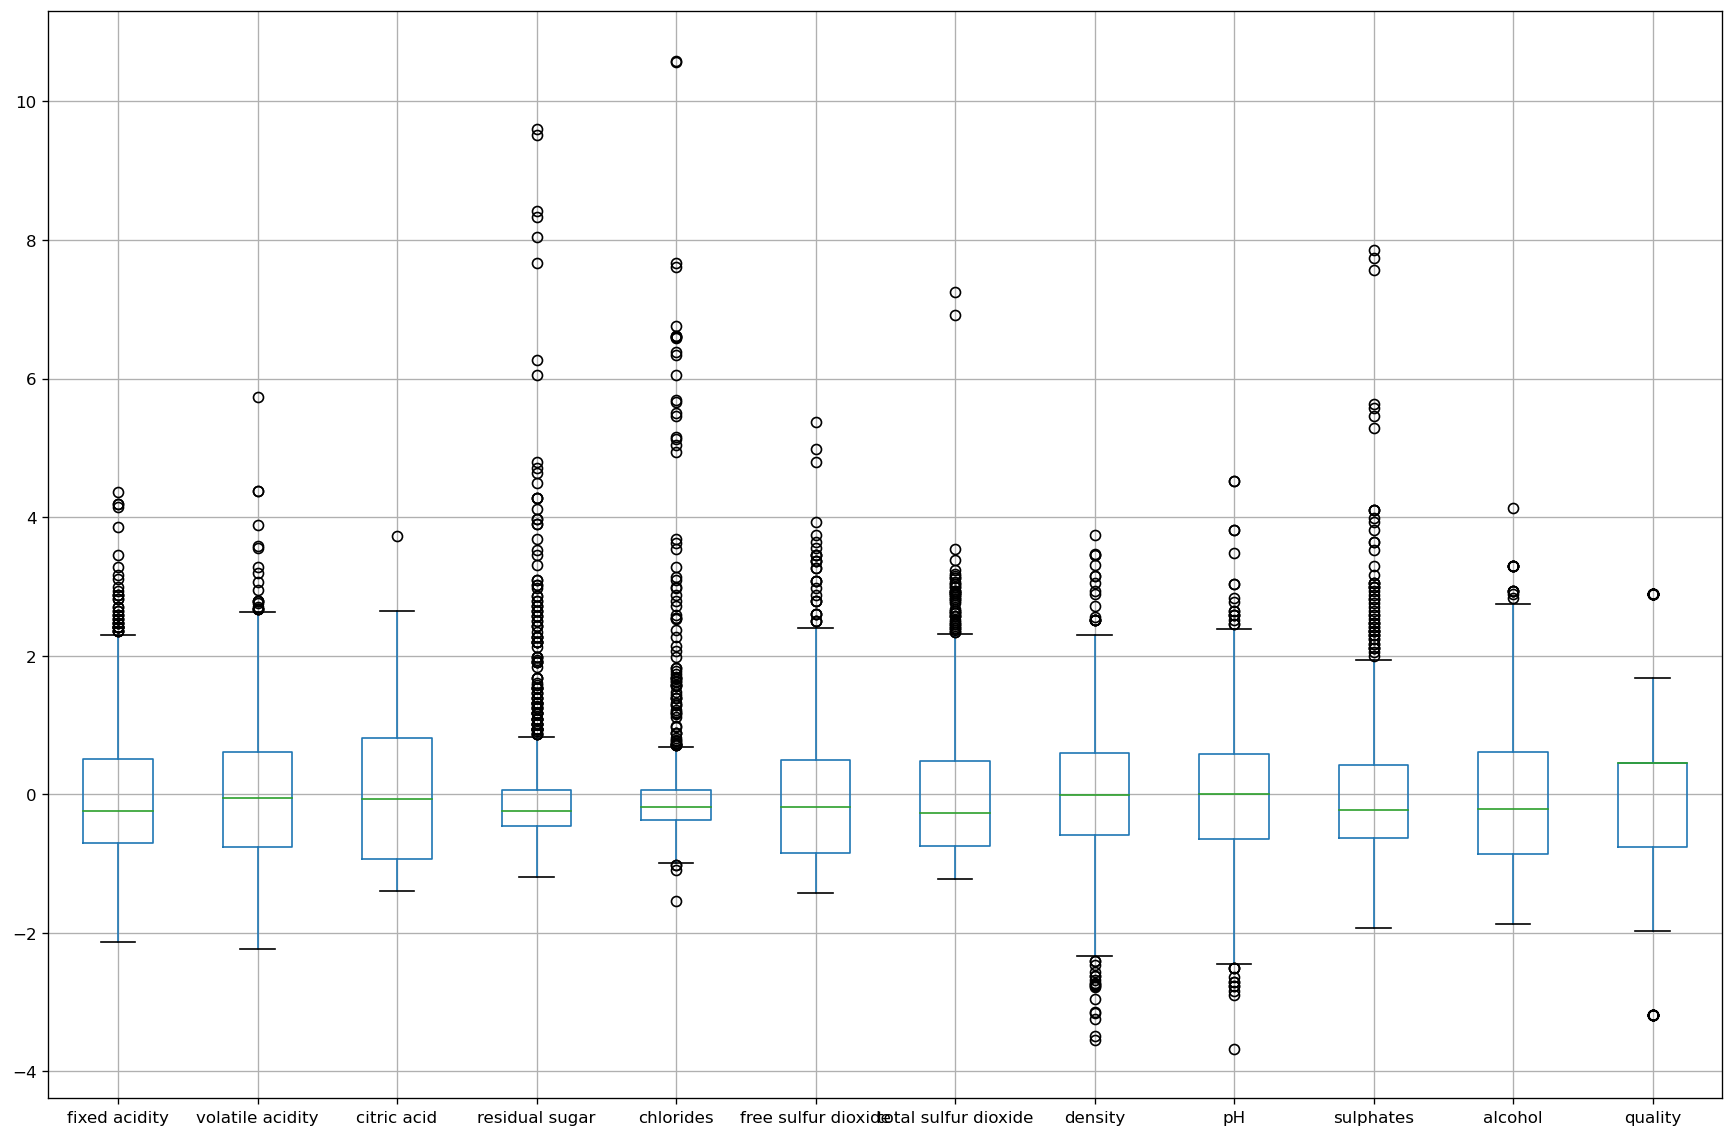

In [190]:
# Check extreme values by BoxPlot

data_z_scored.boxplot(figsize=(18,12)) # Z-scored version. Just for normalization. Not affecting outlier detetion.

In the ``boxplot`` graph above, the "box" has upper and lower boundaries corresponding to __mean +/- 1.5*STD__. The black dots outside the boundries are considered as extreme values.

It is observed that extreme values are prevalant in this dataset and many of them are continuous and dense. We consider those continuous extreme values as true data variability instead of noisy measurement errors. Hence, in the z-scoring method below, we chose a higher threhold __(mean +/-5*STD)__ to eliminate very extreme outliers only.

In [191]:
# Optional: Outlier revomal based on z-scoring.

threshold = 5 # BoxPlot boundary is 1.5: mean +/- 1.5*std. Here I used 5 to filter out very extreme values.
data_cleaned = data[data_z_scored.abs() <= threshold].dropna().reset_index(drop=True) # All rows with entries (z-scored) >3 are dropped
data_cleaned # 1359 rows -> 1232 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1319,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1320,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1321,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1322,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


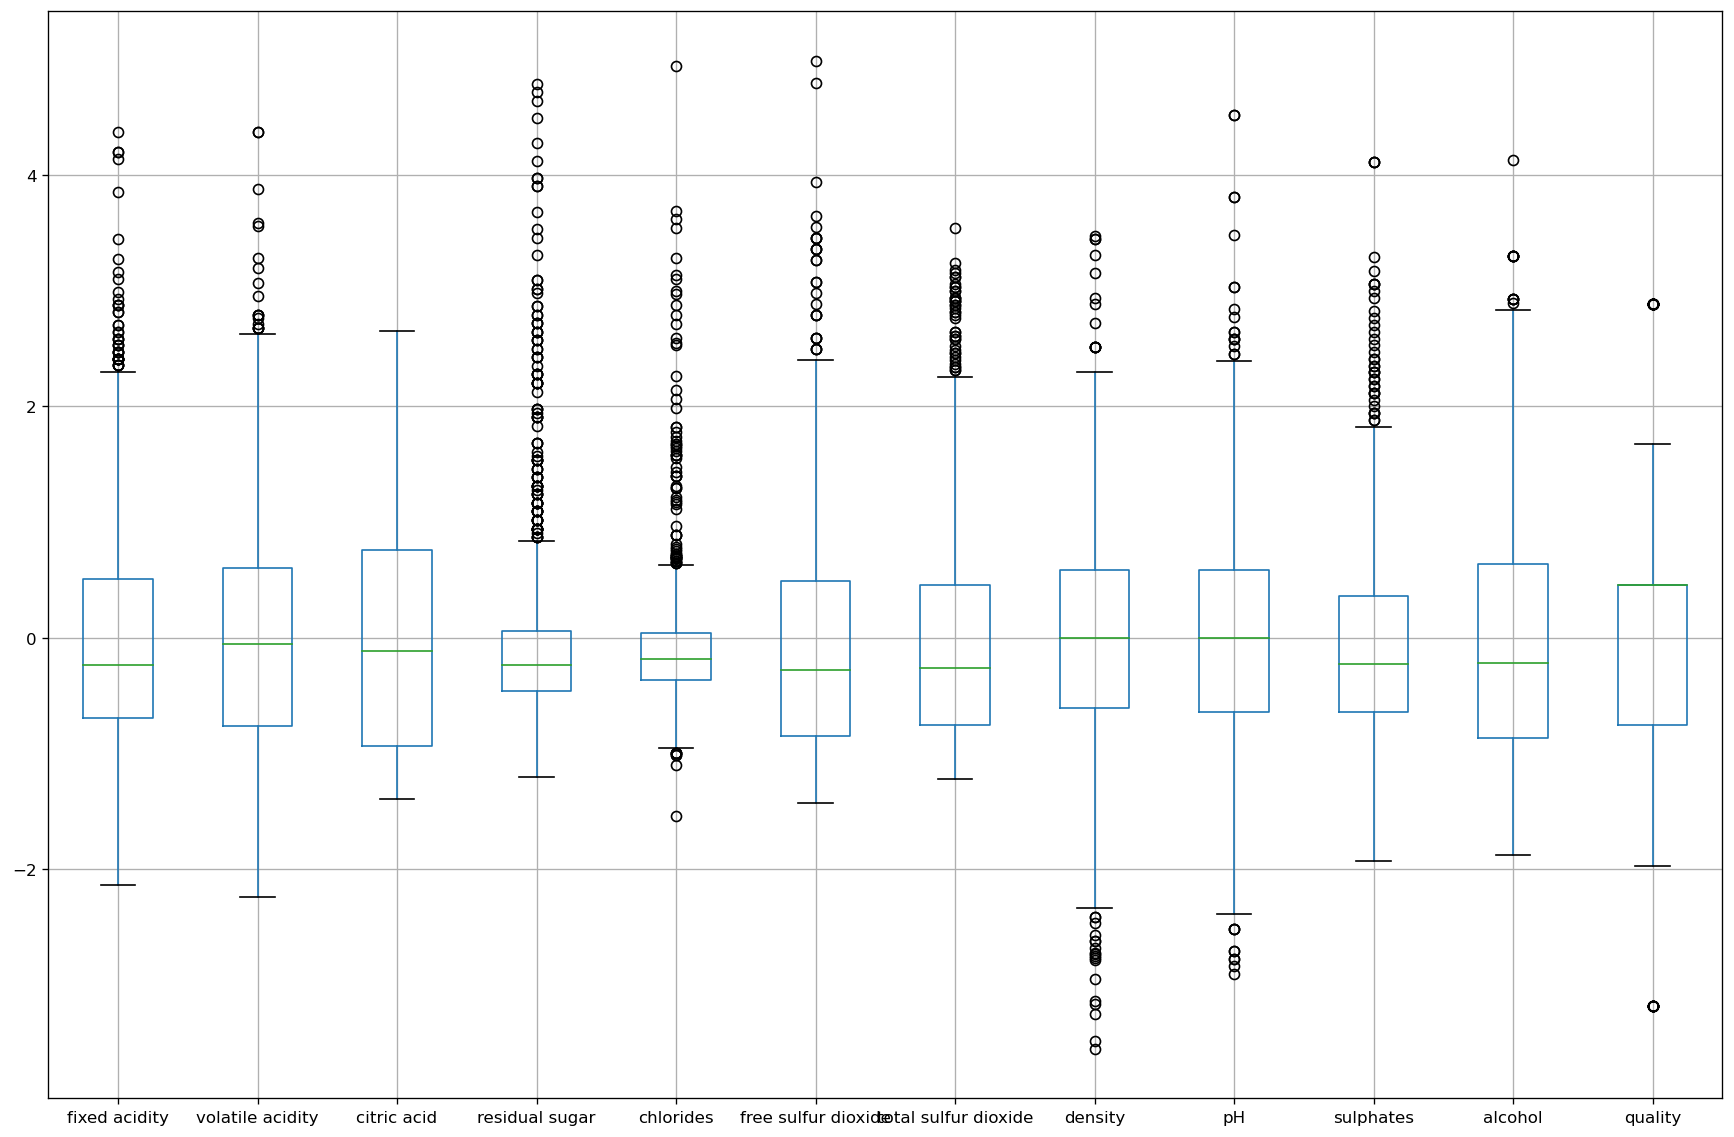

In [192]:
# BoxPlot after outlier removal

data_cleaned_z_scored = data_z_scored[data_z_scored.abs() <= threshold].dropna().reset_index(drop=True)
data_cleaned_z_scored.boxplot(figsize=(18,12)) # Z-scored version here for better visualization.

After outlier removal (absolute z-score>3), all extreme values with z-score <=3 are retained.

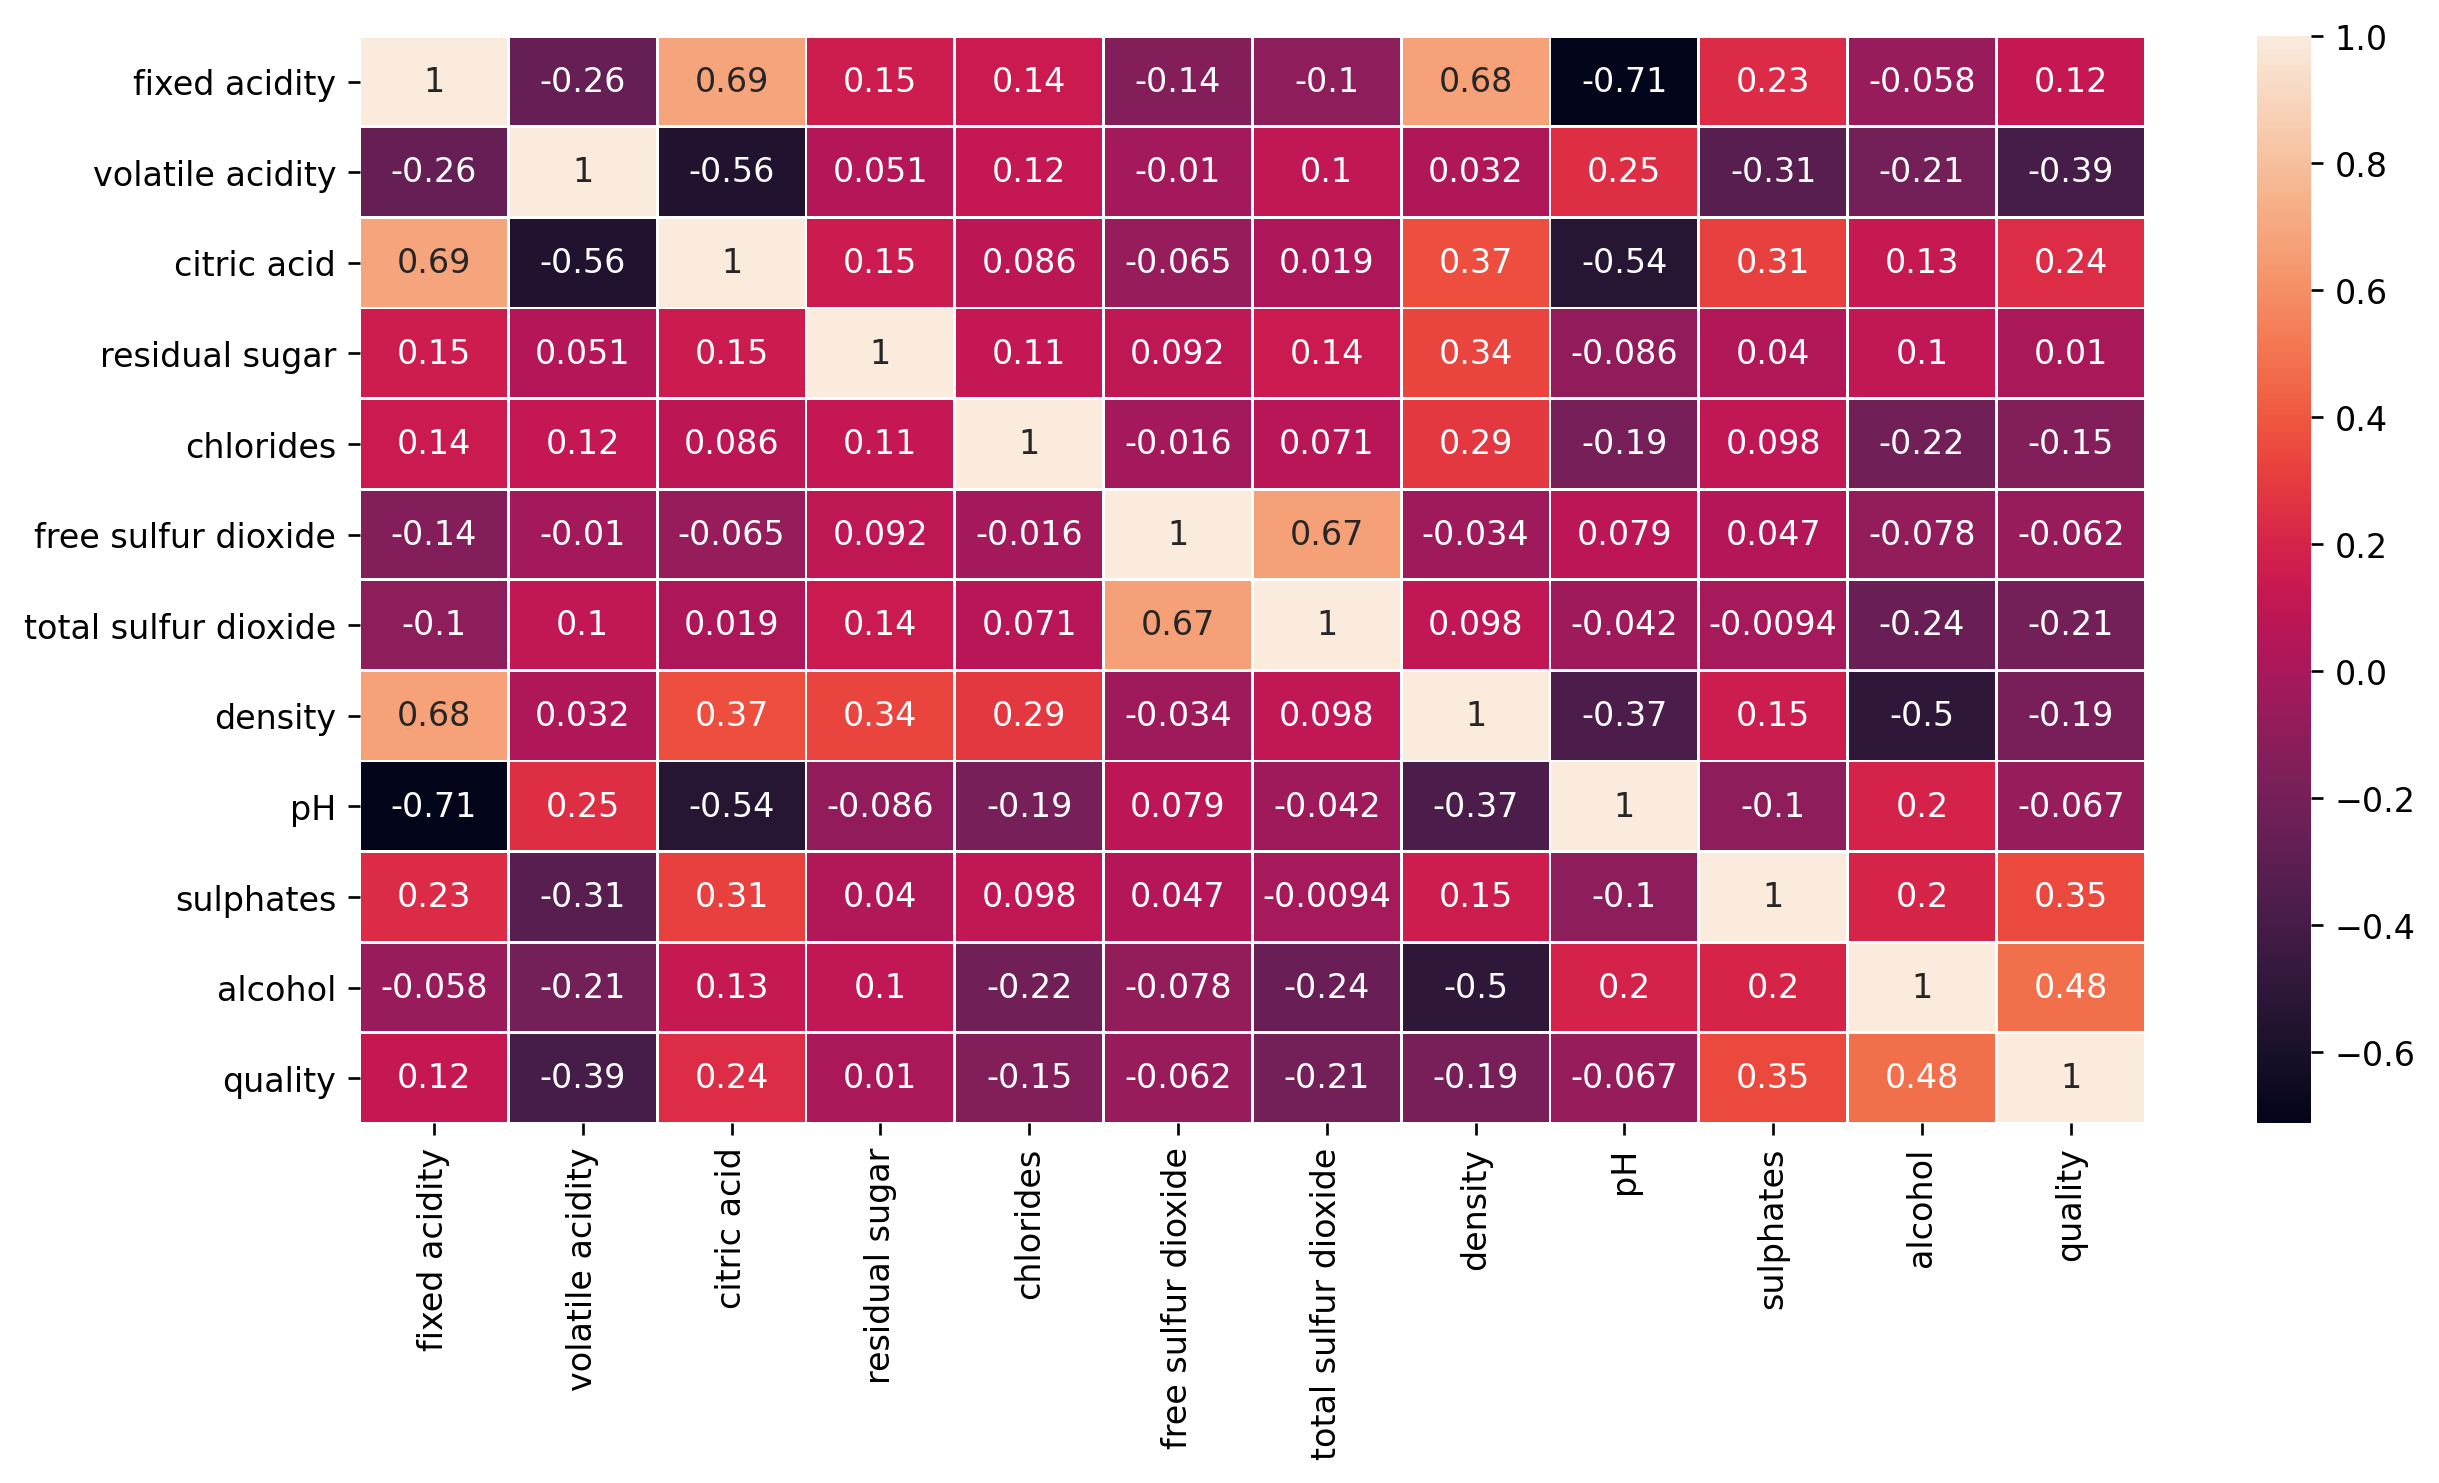

In [193]:
# Check Multicollearity

fig = plt.figure(figsize=(12, 6), dpi=240)
sns.heatmap(data_cleaned.corr(), annot=True, linewidth=.5) # Original Data

From the heatmap, we can identify strong relationships between:

- __pH__ and __fixed acidity__: ``-0.71``
- __pH__ and __citric acidity__: ``-0.54``
- __citric acidity__ and __fixed acidity__: ``0.69``
- __citric acidity__ and __volatile acidity__: ``-0.56``
- __total sulfur dioxide__ and __free sulfur dioxide__: ``0.67``
- __density__ and __alcohol__: ``0.50``
- __quality__ and __alcohol__: ``0.48``

The above correlations are interpretable:
- __Indication Relationship__ PH is a measure of how acid / basic a liquid is.
- __Inclusion Relationship:__ Total sulfur dioxide includes free sulfur dioxide.
- __Opposing Relationship:__ Citric acidity is a type of fixed acidity and has an opposing relationship with volatile acidity.

In [194]:
# Use Variance Inflation Factor (VIF) to double check multicollearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(data_cleaned.values, i) for i in range(data_cleaned.shape[1])]
vif['variable'] = data_cleaned.columns
vif.sort_values(by="VIF").reset_index(drop=True)

,VIF,variable
0,6.646597,free sulfur dioxide
1,6.948938,total sulfur dioxide
2,7.277069,residual sugar
3,9.146197,citric acid
4,11.979819,chlorides
5,18.112168,volatile acidity
6,28.881011,sulphates
7,76.809441,quality
8,80.236290,fixed acidity
9,150.237801,alcohol


VIF>=5 indicates strong correlation. All variables here showed VIF>=5. Regularization, Feature Elimination or PCA could be a way to settle this issue.

In [195]:
# Optional: Multicollearity Settlement through feature elimination

vif = pd.DataFrame()
data_cleaned_eliminated = data_cleaned.copy()
data_cleaned_eliminated = data_cleaned_eliminated.drop(columns=["density", "fixed acidity","pH", "quality", "sulphates"]) # Variables with highest VIFs
vif['VIF'] = [variance_inflation_factor(data_cleaned_eliminated.values, i) for i in range(data_cleaned_eliminated.shape[1])]
vif['variable'] = data_cleaned_eliminated.columns
vif.sort_values(by="VIF").reset_index(drop=True)

,VIF,variable
0,4.677210,citric acid
1,6.274000,total sulfur dioxide
2,6.532399,free sulfur dioxide
3,7.193938,residual sugar
4,10.035910,chlorides
5,13.371395,volatile acidity
6,22.817251,alcohol


Removing``density``,``fixed acidity``, ``pH``, ``quality``, ``sulphates``  significantly relived the multicollearity issue but problem still existed. Among the eliminated variables, ``pH`` is the dependent variable of the linear regression model. To keep variable interpretability, regularization will be further implemented in the regression model section.

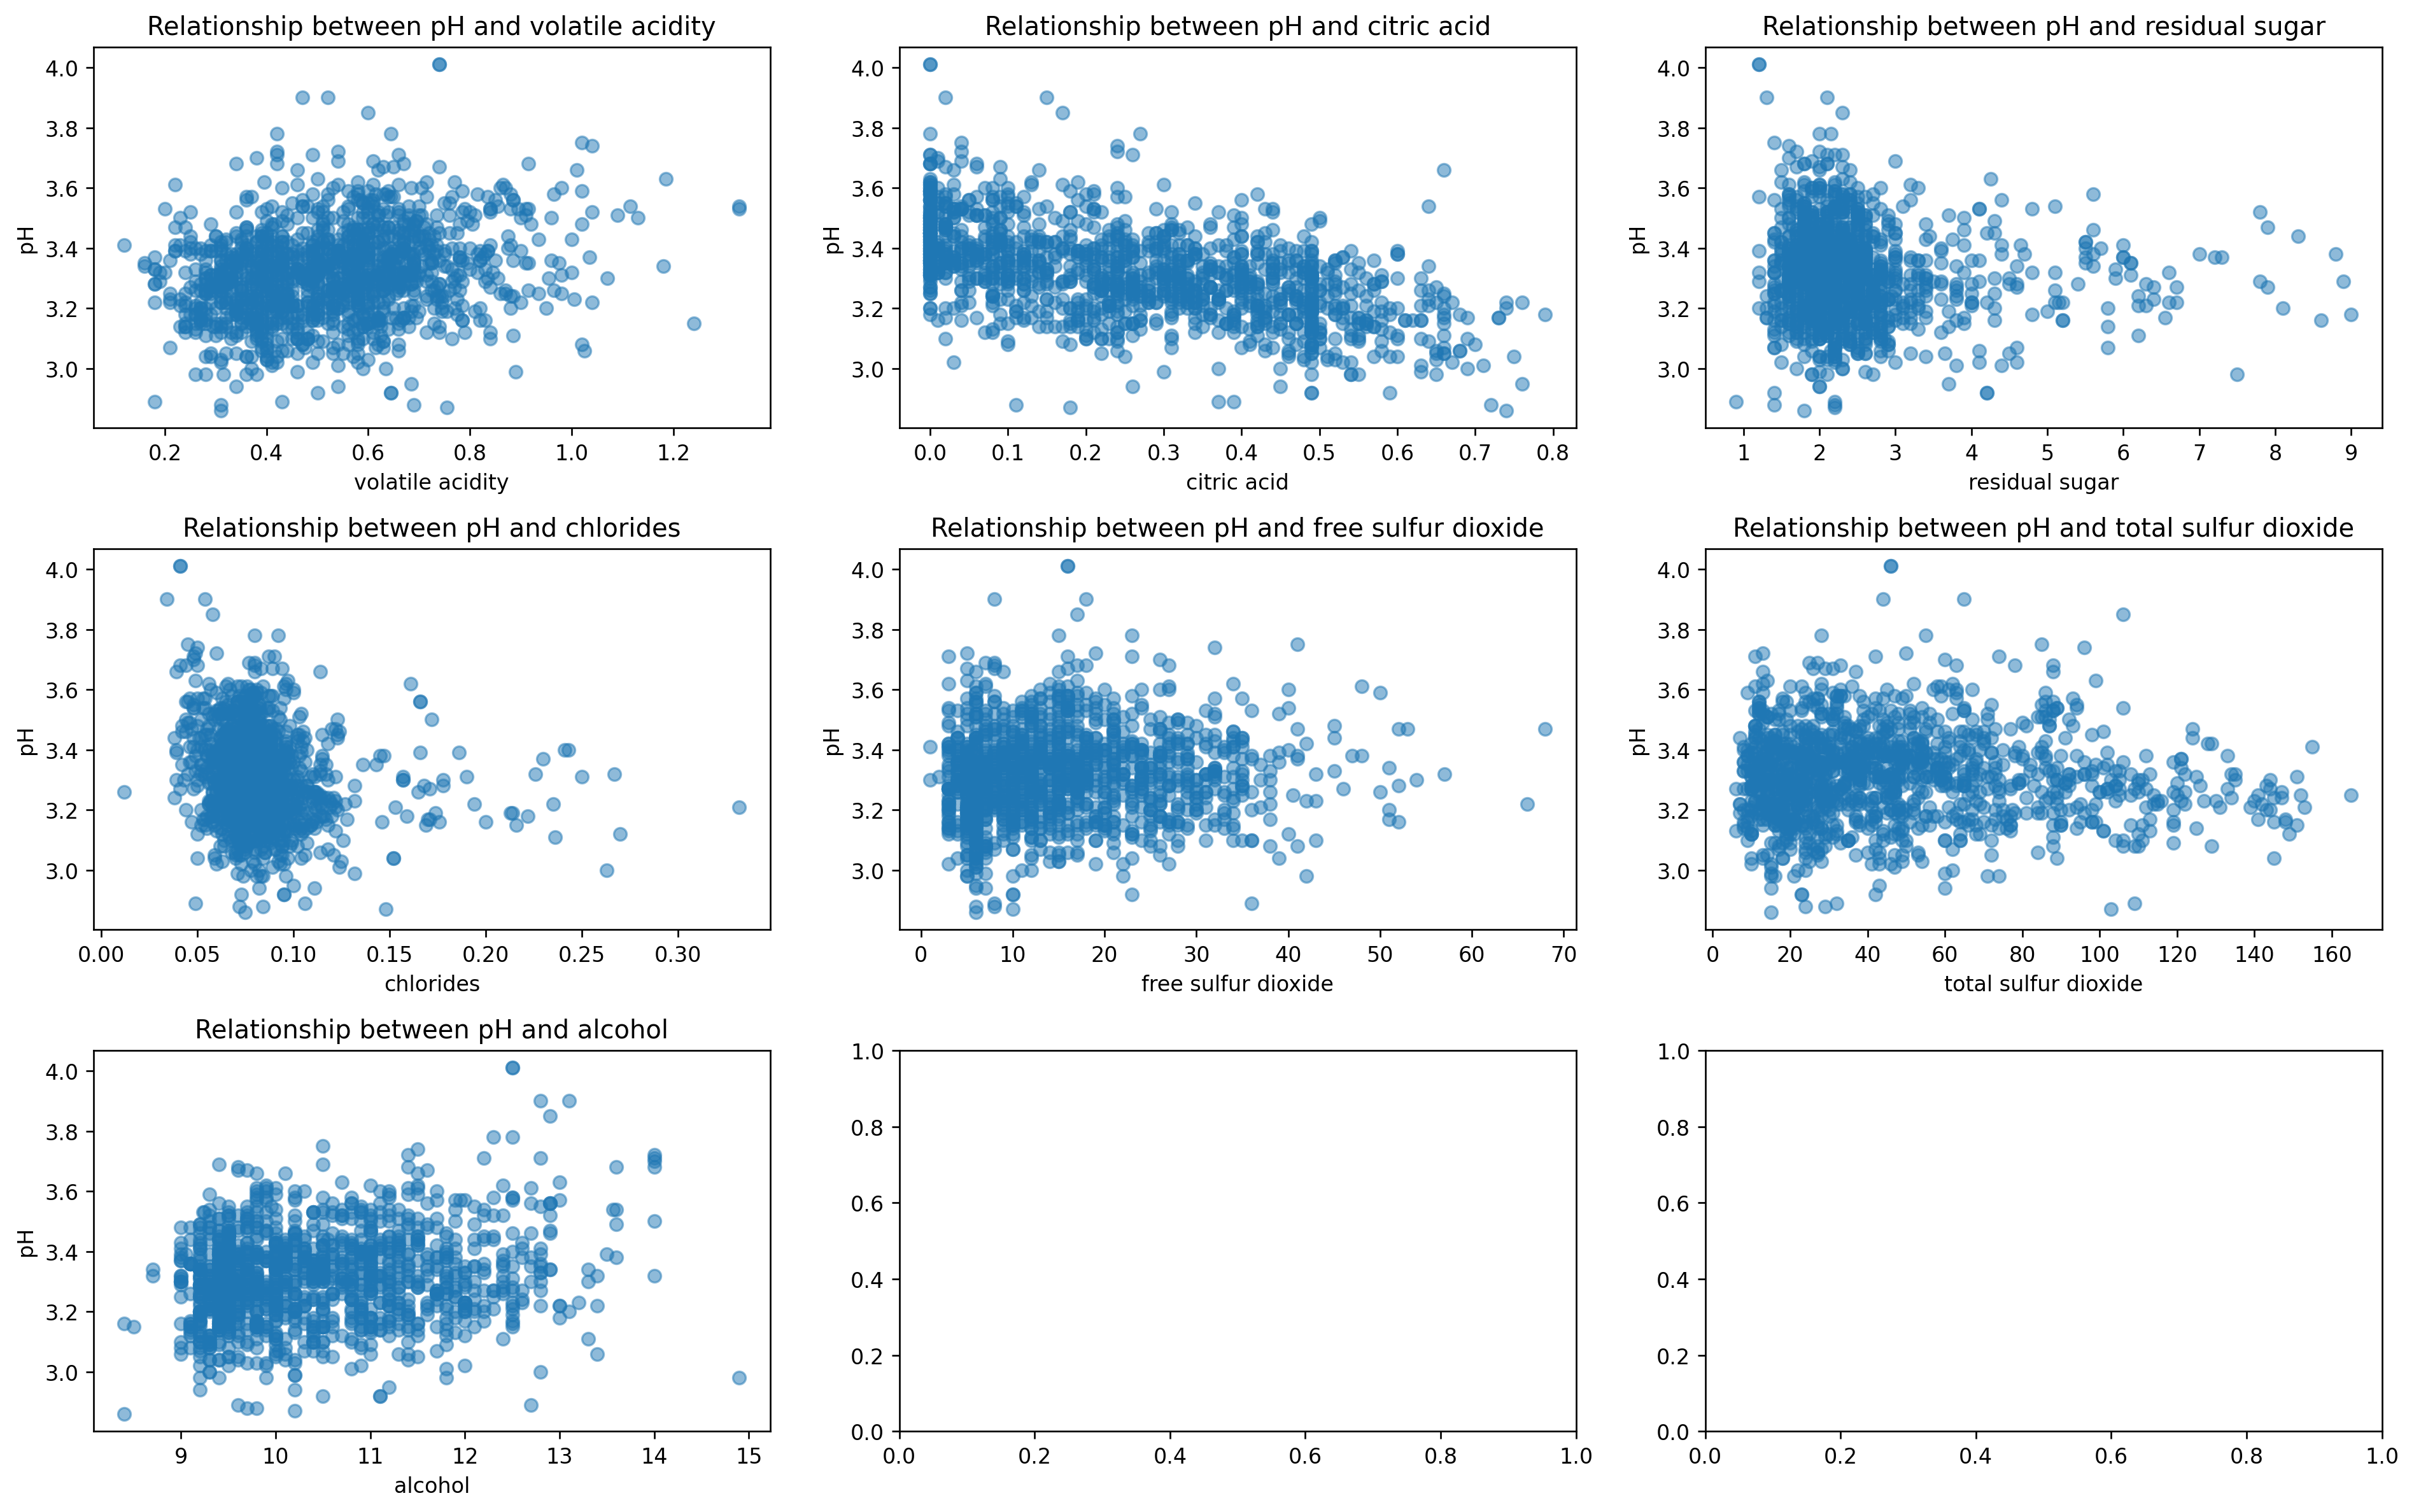

In [196]:
# Visualization of linear relationships between pH and independent variables.

data_cleaned_eliminated["pH"] = data_cleaned["pH"]
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(16,10), tight_layout=True, dpi=240)
for i in range(7):
    tmp = data_cleaned_eliminated.columns[i]
    axes[i//3][i%3].scatter(data = data_cleaned_eliminated, x=tmp, y="pH", alpha=0.5)
    axes[i//3][i%3].set(xlabel=tmp, ylabel = "pH", title="Relationship between pH and "+tmp)

### Datasets Available for Use:
- You can also tune the parameters above to customize the dataset you want.

### Dataset for Regression

__Features:__
- __pH__
- __citric acid__
- __total sulfur dioxide__
- __free sulfur dioxide__
- __residual sugar__
- __chlorides__
- __volatile acidity__
- __alcohol__

__Data Cleaning:__
- Contained all features
- Duplication Removed
- Outliers removed (threshold=5)
- Feature Elimination to reduce high multicollearity

In [197]:
data_cleaned_eliminated#.to_csv("data.csv")

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,alcohol,pH
0,0.700,0.00,1.9,0.076,11.0,34.0,9.4,3.51
1,0.880,0.00,2.6,0.098,25.0,67.0,9.8,3.20
2,0.760,0.04,2.3,0.092,15.0,54.0,9.8,3.26
3,0.280,0.56,1.9,0.075,17.0,60.0,9.8,3.16
4,0.660,0.00,1.8,0.075,13.0,40.0,9.4,3.51
...,...,...,...,...,...,...,...,...
1319,0.620,0.08,1.9,0.068,28.0,38.0,9.5,3.42
1320,0.600,0.08,2.0,0.090,32.0,44.0,10.5,3.45
1321,0.550,0.10,2.2,0.062,39.0,51.0,11.2,3.52
1322,0.645,0.12,2.0,0.075,32.0,44.0,10.2,3.57


### Dataset for Classification & Huypothesis Testing
__Data Cleaning:__
- Contained all features
- Duplication Removed
- Outliers removed (threshold=5)

In [198]:
# Not Z-scored Version

data_cleaned#.to_csv("data.csv")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1319,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1320,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1321,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1322,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [199]:
# Z-scored Version

data_cleaned_z_scored#.to_csv("data.csv")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524238,0.931657,-1.392745,-0.460987,-0.245532,-0.468381,-0.383908,0.583788,1.291397,-0.578348,-0.954023,-0.756762
1,-0.293955,1.915095,-1.392745,0.056644,0.200020,0.871682,0.603851,0.048719,-0.708135,0.124776,-0.584360,-0.756762
2,-0.293955,1.259470,-1.188180,-0.165198,0.078506,-0.085506,0.214734,0.155733,-0.321129,-0.051005,-0.584360,-0.756762
3,1.663455,-1.363032,1.471170,-0.460987,-0.265785,0.105932,0.394326,0.690802,-0.966139,-0.461161,-0.584360,0.457452
4,-0.524238,0.713115,-1.392745,-0.534935,-0.265785,-0.276944,-0.204316,0.583788,1.291397,-0.578348,-0.954023,-0.756762
...,...,...,...,...,...,...,...,...,...,...,...,...
1319,-0.869663,0.494574,-0.983615,-0.460987,-0.407552,1.158838,-0.264180,-0.106451,0.710888,0.945087,-0.861607,0.457452
1320,-1.215088,0.385303,-0.983615,-0.387040,0.038001,1.541713,-0.084587,-0.967912,0.904391,-0.461161,0.062551,-0.756762
1321,-1.387801,0.112125,-0.881332,-0.239145,-0.529066,2.211745,0.124937,-0.850197,1.355898,0.593525,0.709462,0.457452
1322,-1.387801,0.631162,-0.779049,-0.387040,-0.265785,1.541713,-0.084587,-0.662923,1.678403,0.300557,-0.214696,-0.756762
